In [1]:
#IMPORT LIBRARIES 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# IMPORT DATASET
dataset = pd.read_csv("F:/Yoshops/Task_2/orders_2020_2021_DataSet_Updated.csv")

In [3]:
dataset.head()

,Order #,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,Tax Method,Taxes,Total,Coupon Code,...,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,Download Status,LineItem Type
0,R121113121,NaN,INR,2299,Ships Free,0,NaN,0.0,2299,NaN,...,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,2299,NaN,physical
1,R472890631,NaN,INR,2299,Ships Free,0,NaN,0.0,2299,NaN,...,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,2299,NaN,physical
2,R004476488,NaN,INR,2299,Ships Free,0,NaN,0.0,2299,NaN,...,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,2299,NaN,physical
3,R526038353,NaN,INR,2299,Ships Free,0,NaN,0.0,2299,NaN,...,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,2299,NaN,physical
4,R658530771,NaN,INR,349,Ships Free,0,NaN,0.0,349,NaN,...,NaN,NaN,Barbie Doll (pink),PL00098,NaN,NaN,1,349,NaN,physical


In [4]:
dataset.columns

Index(['Order #', 'Fulfillment Date and Time Stamp', 'Currency', 'Subtotal',
       'Shipping Method', 'Shipping Cost', 'Tax Method', 'Taxes', 'Total',
       'Coupon Code', 'Coupon Code Name', ' ', 'Billing Name',
       'Billing Country', 'Billing Street Address', 'Billing Street Address 2',
       'Billing City', 'Billing State', 'Billing Zip', 'Shipping Name',
       'Shipping Country', 'Shipping Street Address',
       'Shipping Street Address 2', 'Shipping City', 'Shipping State',
       'Shipping Zip', 'Gift Cards', 'Payment Method', 'Tracking #',
       'Special Instructions', 'LineItem Name', 'LineItem SKU',
       'LineItem Options', 'LineItem Add-ons', 'LineItem Qty',
       'LineItem Sale Price', 'Download Status', 'LineItem Type'],
      dtype='object')

In [5]:
dataset.dtypes

Order #                             object
Fulfillment Date and Time Stamp     object
Currency                            object
Subtotal                            object
Shipping Method                     object
Shipping Cost                        int64
Tax Method                          object
Taxes                              float64
Total                               object
Coupon Code                         object
Coupon Code Name                    object
                                   float64
Billing Name                        object
Billing Country                     object
Billing Street Address              object
Billing Street Address 2            object
Billing City                        object
Billing State                       object
Billing Zip                         object
Shipping Name                       object
Shipping Country                    object
Shipping Street Address             object
Shipping Street Address 2           object
Shipping Ci

In [6]:
dataset.shape

(3039, 38)

In [7]:
dataset.isnull().sum()

Order #                               0
Fulfillment Date and Time Stamp    2801
Currency                              0
Subtotal                              0
Shipping Method                       0
Shipping Cost                         0
Tax Method                         3038
Taxes                                 0
Total                                 0
Coupon Code                        2797
Coupon Code Name                   2797
                                      0
Billing Name                       2664
Billing Country                    2664
Billing Street Address             2664
Billing Street Address 2           2811
Billing City                       2664
Billing State                      2670
Billing Zip                        2664
Shipping Name                         0
Shipping Country                      0
Shipping Street Address              19
Shipping Street Address 2           982
Shipping City                        19
Shipping State                       22


In [8]:
dataset['Same_Billing_Shipping_Address']=dataset['Download Status']
dataset['Multiple_Orders']=dataset['Download Status']
dataset['Unusual_Large_Orders']=dataset['Download Status']
dataset['Multiple_Orders_via_diff_payment']=dataset['Download Status']
dataset['Unexpected_international_orders']=dataset['Download Status']

dataset['Same_Billing_Shipping_Address_item']=dataset['Download Status']
dataset['Multiple_Orders_item']=dataset['Download Status']
dataset['Unusual_Large_Orders_item']=dataset['Download Status']
dataset['Multiple_Orders_via_diff_payment_item']=dataset['Download Status']
dataset['Unexpected_international_orders_item']=dataset['Download Status']

In [9]:
df1=dataset[['Order #','Billing Street Address','Shipping Street Address','LineItem Name']]
df1 = df1.dropna()

In [10]:
df1.isnull().sum()

Order #                    0
Billing Street Address     0
Shipping Street Address    0
LineItem Name              0
dtype: int64

In [11]:
#number of rows in df1
n=df1.shape[0]
n

375

In [12]:
# create an Empty pandas DataFrame with column names
#df = pd.DataFrame(columns = ['Orders N.O. Having Same Billing and Shipping Address', 'Order N.O. Having Multiple Orders', 'Order N.O. of Unusually Large Orders','Order N.O. of Multiple orders to the same address with different payment method','Order N.O. of Unexpected international orders'])
#print(df)

In [13]:
#&(dataset['Billing Street Address 2'].iloc[i]== dataset['Shipping Street Address 2'].iloc[i])

In [14]:
# 1. Finding orders having The shipping address differs from the billing address.

i=0
j=0

for i in range(n):
  if ((pd.notnull(df1['Billing Street Address'].iloc[i])!=df1['Shipping Street Address'].iloc[i])):
    dataset['Same_Billing_Shipping_Address'].iloc[j] = df1['Order #'].iloc[i]
    dataset['Same_Billing_Shipping_Address_item'].iloc[j] = df1['LineItem Name'].iloc[i]
    j=j+1
i= i+1

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
# 2. Multiple Order of Same Item

i=0
j=0
k=0

for i in range(3039):
    for j in range(3039):
        if (i!=j):
            if (dataset['Shipping Street Address'].iloc[i]==dataset['Shipping Street Address'].iloc[j]):
                dataset['Multiple_Orders'].iloc[k] = dataset['Order #'].iloc[i]
                dataset['Multiple_Orders_item'].iloc[k] = dataset['LineItem Name'].iloc[i]
                k=k+1 
    j=j+1
i=i+1

In [16]:
# 3. Unusual Large Orders
i=0
j=0

for i in range(3039):
  if (dataset['LineItem Sale Price'].iloc[i]>20000):
    dataset['Unusual_Large_Orders'].iloc[j] = dataset['Order #'].iloc[i]
    dataset['Unusual_Large_Orders_item'].iloc[j] = dataset['LineItem Name'].iloc[i]
    j=j+1
i= i+1

In [17]:
# 4. Multiple orders to the same address with different payment method

i=0
j=0
k=0

for i in range(3039):
    for j in range(3039):
        if (i!=j):
            if ((dataset['Shipping Street Address'].iloc[i]==dataset['Shipping Street Address'].iloc[j])and(dataset['LineItem Name'].iloc[i]==dataset['LineItem Name'].iloc[j])and(dataset['Payment Method'].iloc[i]!=dataset['Payment Method'].iloc[j])):
                dataset['Multiple_Orders_via_diff_payment'].iloc[k] = dataset['Order #'].iloc[i]
                dataset['Multiple_Orders_via_diff_payment_item'].iloc[k] = dataset['LineItem Name'].iloc[i]
                k=k+1 
    j=j+1
i=i+1

In [18]:
# 5. Unexpected_international_orders
i=0
j=0

for i in range(3039):
  if (dataset['Shipping Country'].iloc[i]!='IND'):
    dataset['Unexpected_international_orders'].iloc[j] = dataset['Order #'].iloc[i]
    dataset['Unexpected_international_orders_item'].iloc[j] = dataset['LineItem Name'].iloc[i]
    j=j+1
i= i+1

In [19]:
dataset

,Order #,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,Tax Method,Taxes,Total,Coupon Code,...,Same_Billing_Shipping_Address,Multiple_Orders,Unusual_Large_Orders,Multiple_Orders_via_diff_payment,Unexpected_international_orders,Same_Billing_Shipping_Address_item,Multiple_Orders_item,Unusual_Large_Orders_item,Multiple_Orders_via_diff_payment_item,Unexpected_international_orders_item
0,R121113121,NaN,INR,2299,Ships Free,0,NaN,0.0,2299,NaN,...,R121113121,R121113121,R915143888,R121113121,R711371655,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,SONY PlayStation PS4 PRO 1TB Hard Disk(Black),Falcon Drone Four Axis Aircraft with 2.4 GHz R...,Reliance Jio Phone 2
1,R472890631,NaN,INR,2299,Ships Free,0,NaN,0.0,2299,NaN,...,R711371655,R121113121,R378334409,R121113121,R159642587,Reliance Jio Phone 2,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,SONY PlayStation PS4 PRO 1TB Hard Disk(Black),Falcon Drone Four Axis Aircraft with 2.4 GHz R...,Nova NHC-3791 Electric Hair Trimmer (Black)
2,R004476488,NaN,INR,2299,Ships Free,0,NaN,0.0,2299,NaN,...,R728042506,R472890631,R731855975,R472890631,R046814280,Zebronics ZEB-16A 16 inch (39.6 cm) LED Monito...,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,SONY PlayStation PS4 PRO 1TB Hard Disk(Black),Falcon Drone Four Axis Aircraft with 2.4 GHz R...,Reliance Jio Phone
3,R526038353,NaN,INR,2299,Ships Free,0,NaN,0.0,2299,NaN,...,R113535804,R472890631,R790458895,R472890631,R537836718,Lava Captain N1 Red,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,SONY PlayStation PS4 PRO 1TB Hard Disk(Black),Falcon Drone Four Axis Aircraft with 2.4 GHz R...,Men Formal Shoes Black Color With Free Sunglasses
4,R658530771,NaN,INR,349,Ships Free,0,NaN,0.0,349,NaN,...,R046814280,R004476488,R969952776,R004476488,R645155068,Reliance Jio Phone,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,SONY PlayStation PS4 PRO 1TB Hard Disk(Black),Falcon Drone Four Axis Aircraft with 2.4 GHz R...,Reliance Jio Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,R243395005,NaN,INR,50,Ships Free,0,NaN,0.0,50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3035,R607209508,NaN,INR,500,Ships Free,0,NaN,0.0,500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3036,R140316623,NaN,INR,4000,Ships Free,0,NaN,0.0,4000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3037,R192037084,NaN,INR,2000,Ships Free,0,NaN,0.0,2000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dataset.isnull().sum()

Order #                                     0
Fulfillment Date and Time Stamp          2801
Currency                                    0
Subtotal                                    0
Shipping Method                             0
Shipping Cost                               0
Tax Method                               3038
Taxes                                       0
Total                                       0
Coupon Code                              2797
Coupon Code Name                         2797
                                            0
Billing Name                             2664
Billing Country                          2664
Billing Street Address                   2664
Billing Street Address 2                 2811
Billing City                             2664
Billing State                            2670
Billing Zip                              2664
Shipping Name                               0
Shipping Country                            0
Shipping Street Address           

In [21]:
dataset['Shipping Country'].iloc[3038]

'IND'

In [22]:
# creating the bar plot
#plt.bar(courses, values, color ='maroon',width = 0.4)

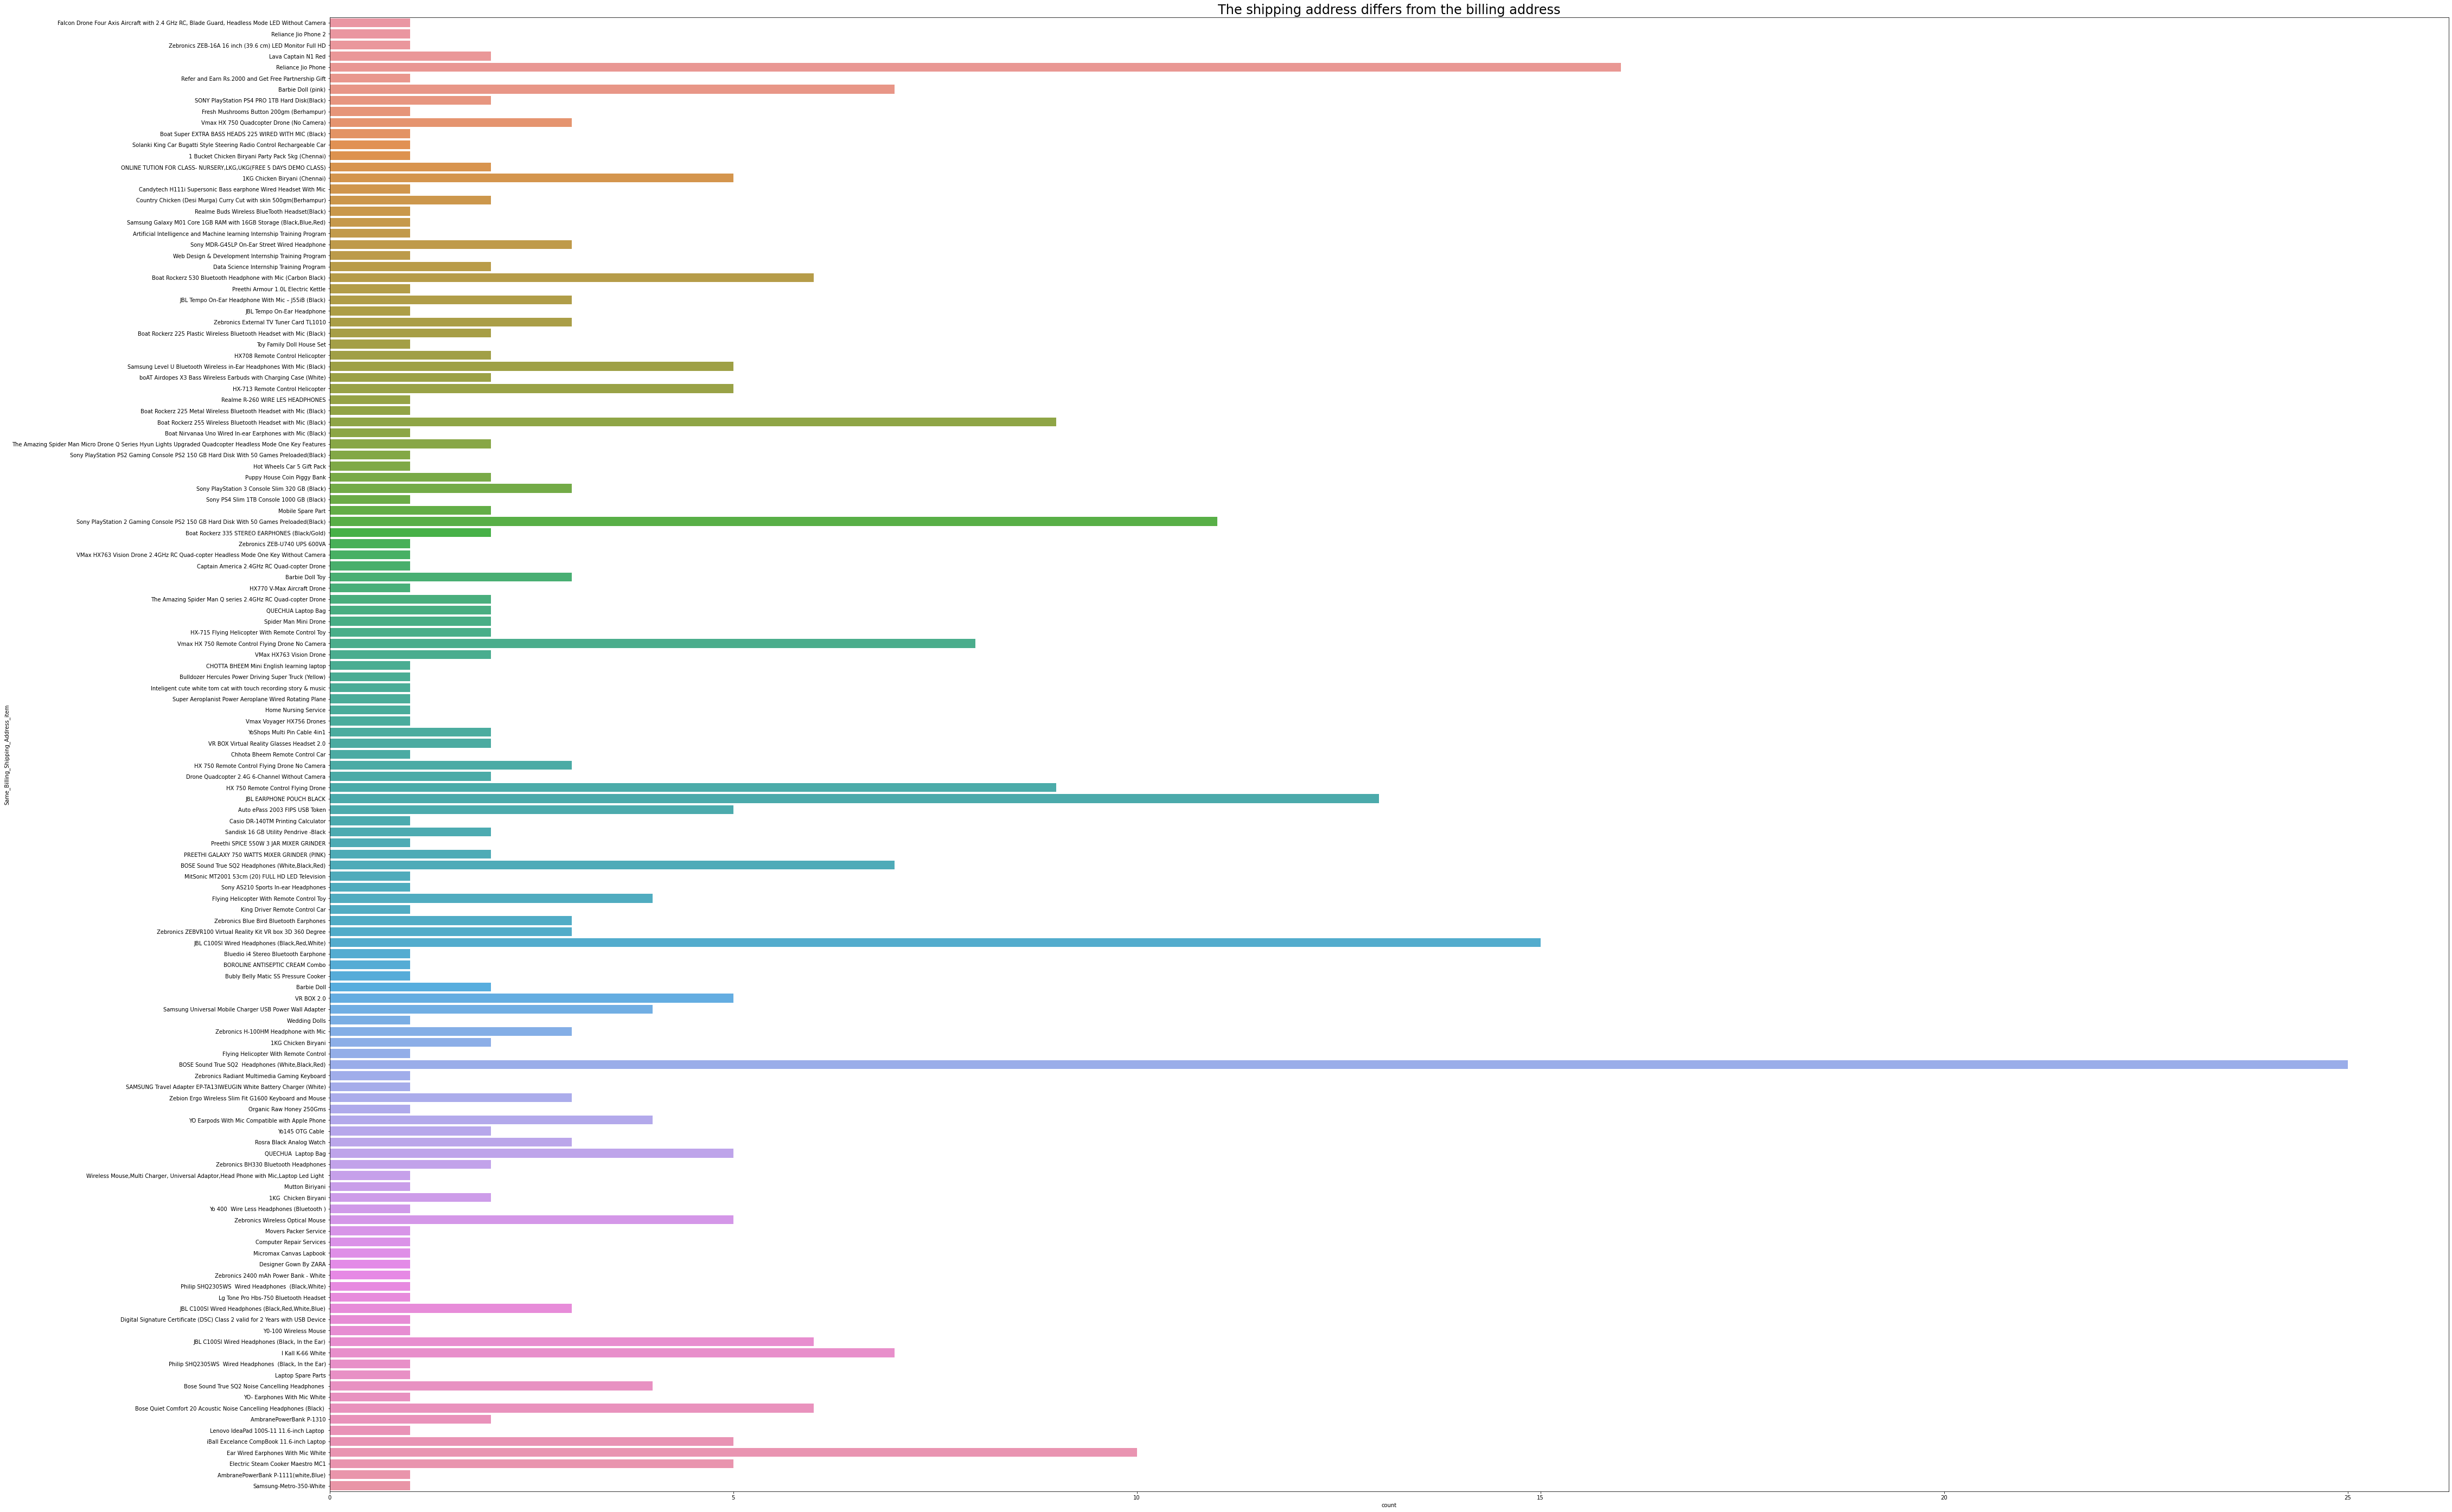

In [23]:
# PLOT - The shipping address differs from the billing address
plt.figure(figsize=(70,50))
plt.title( "The shipping address differs from the billing address" , size = 24 )
sns.countplot(y='Same_Billing_Shipping_Address_item', data=dataset)
plt.savefig('Fraud_check_1.pdf')
plt.show()

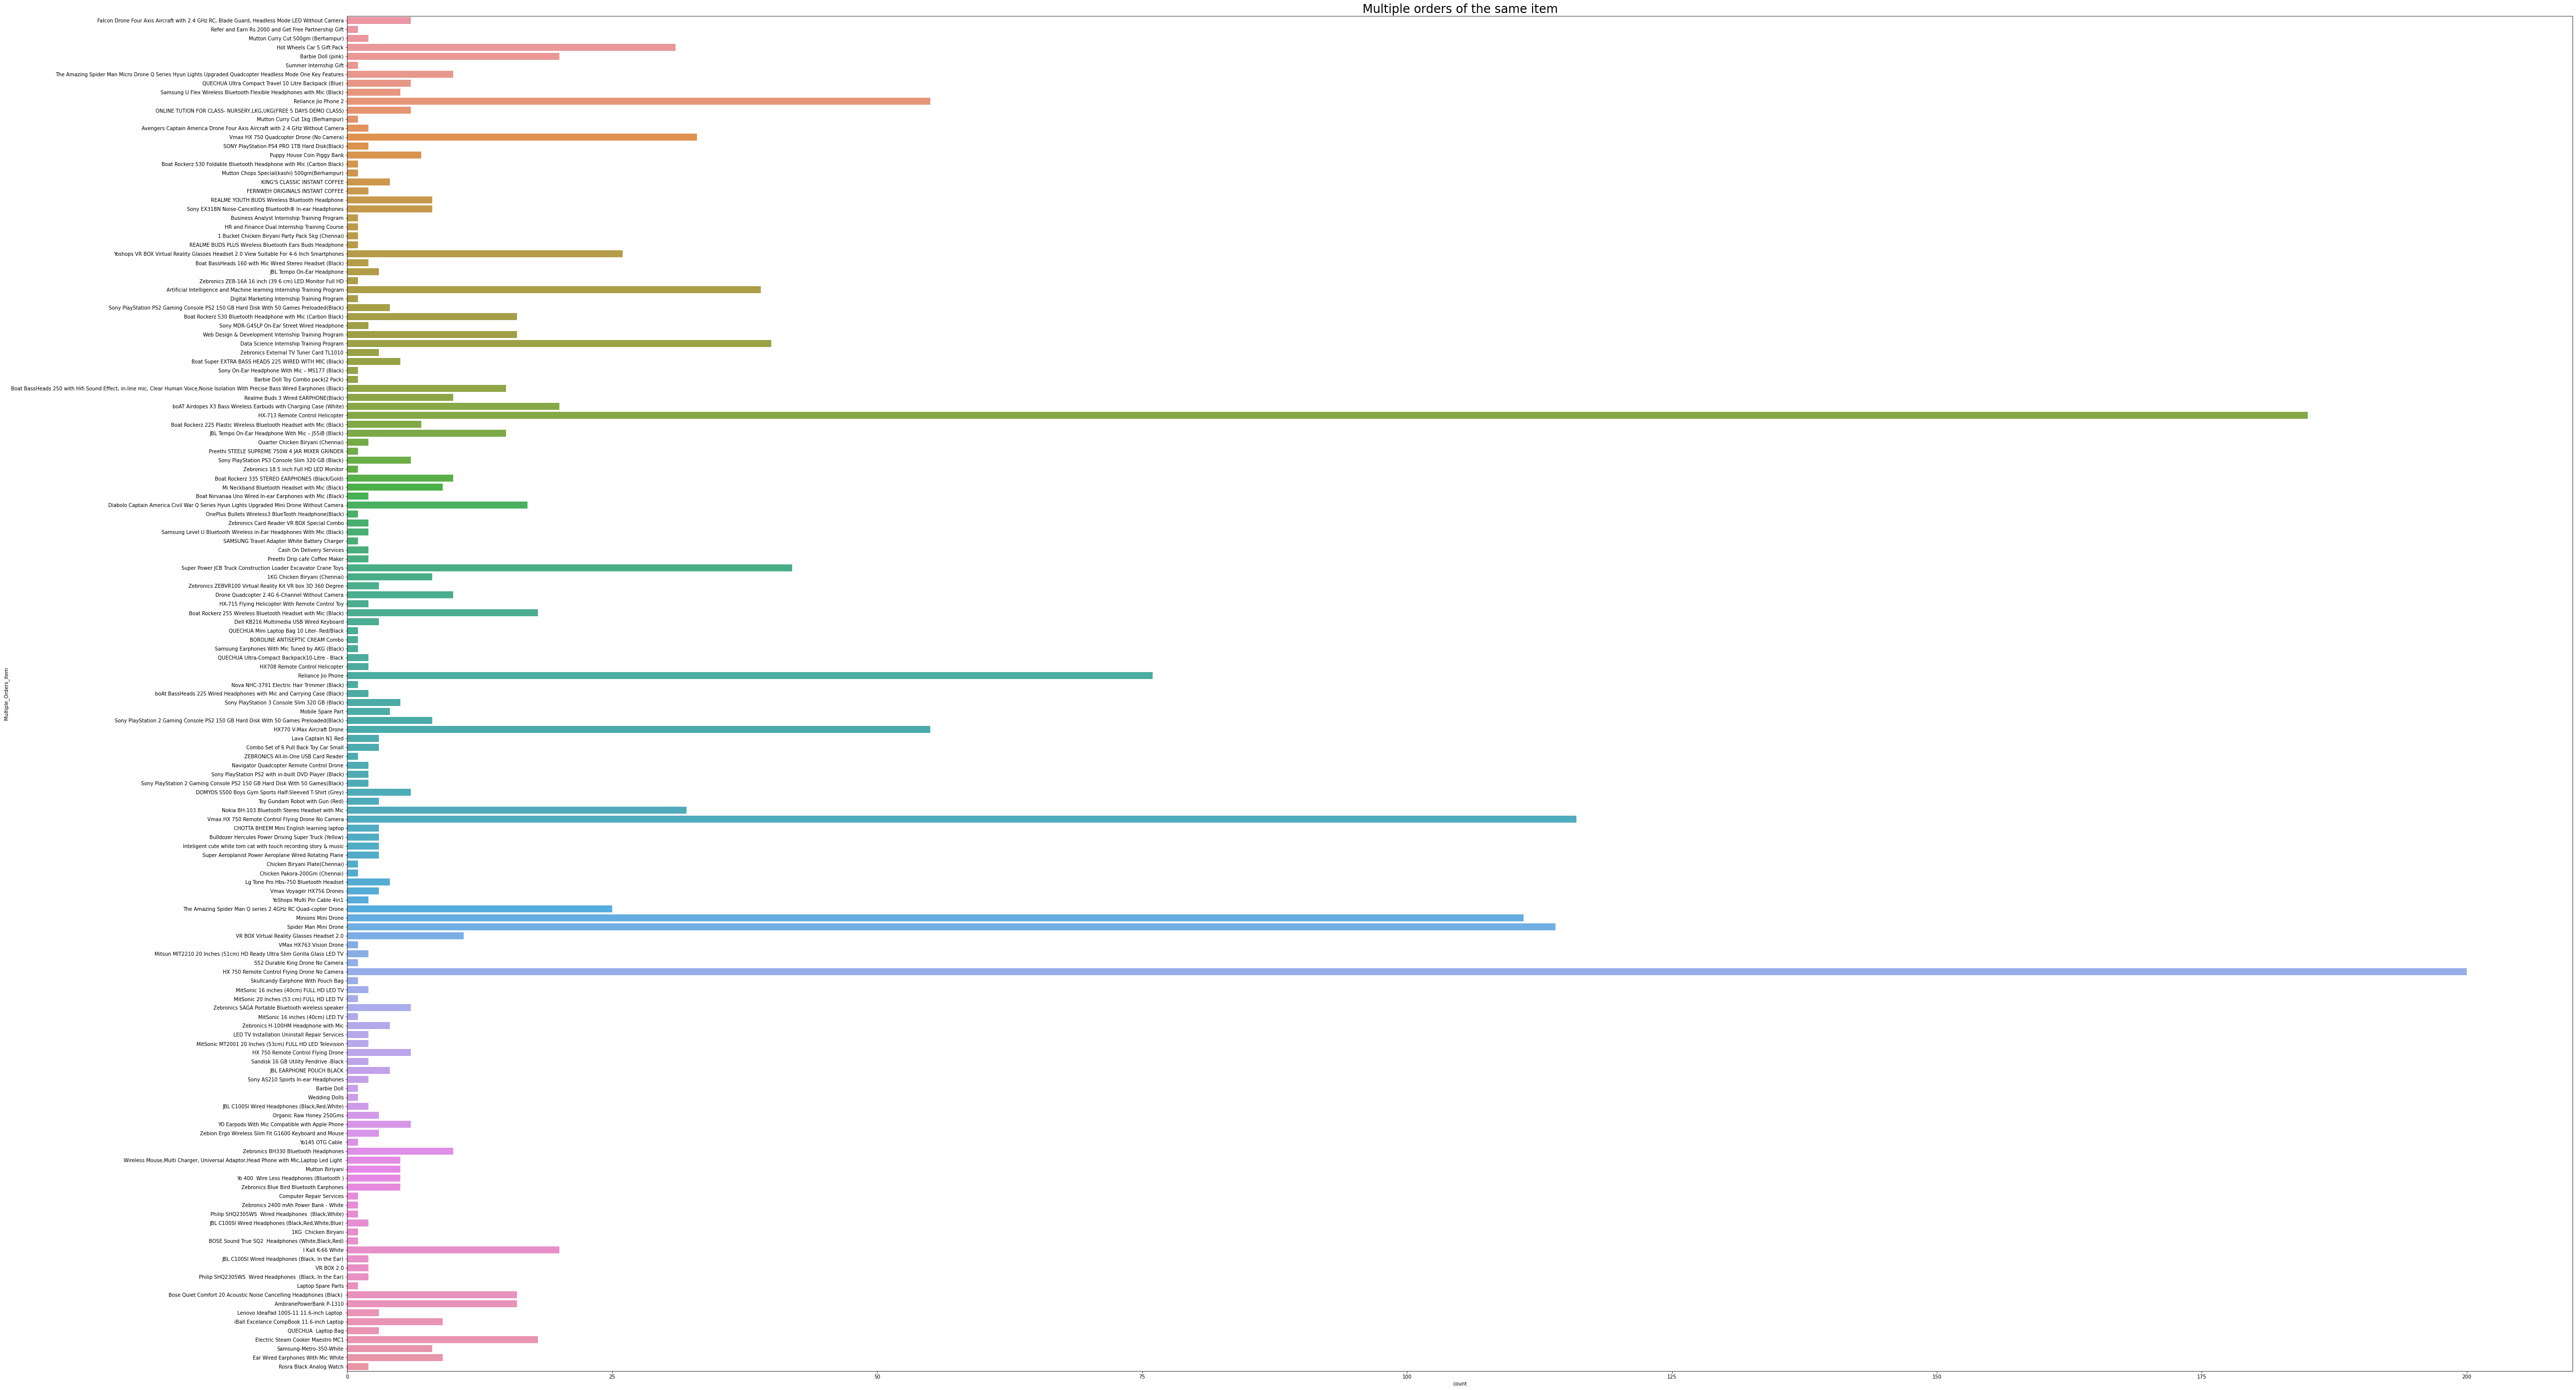

In [24]:
# PLOT - Multiple orders of the same item
plt.figure(figsize=(80,50))
plt.title( "Multiple orders of the same item" , size = 24 )
sns.countplot(y='Multiple_Orders_item',data=dataset)
plt.savefig('Fraud_check_2.pdf')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


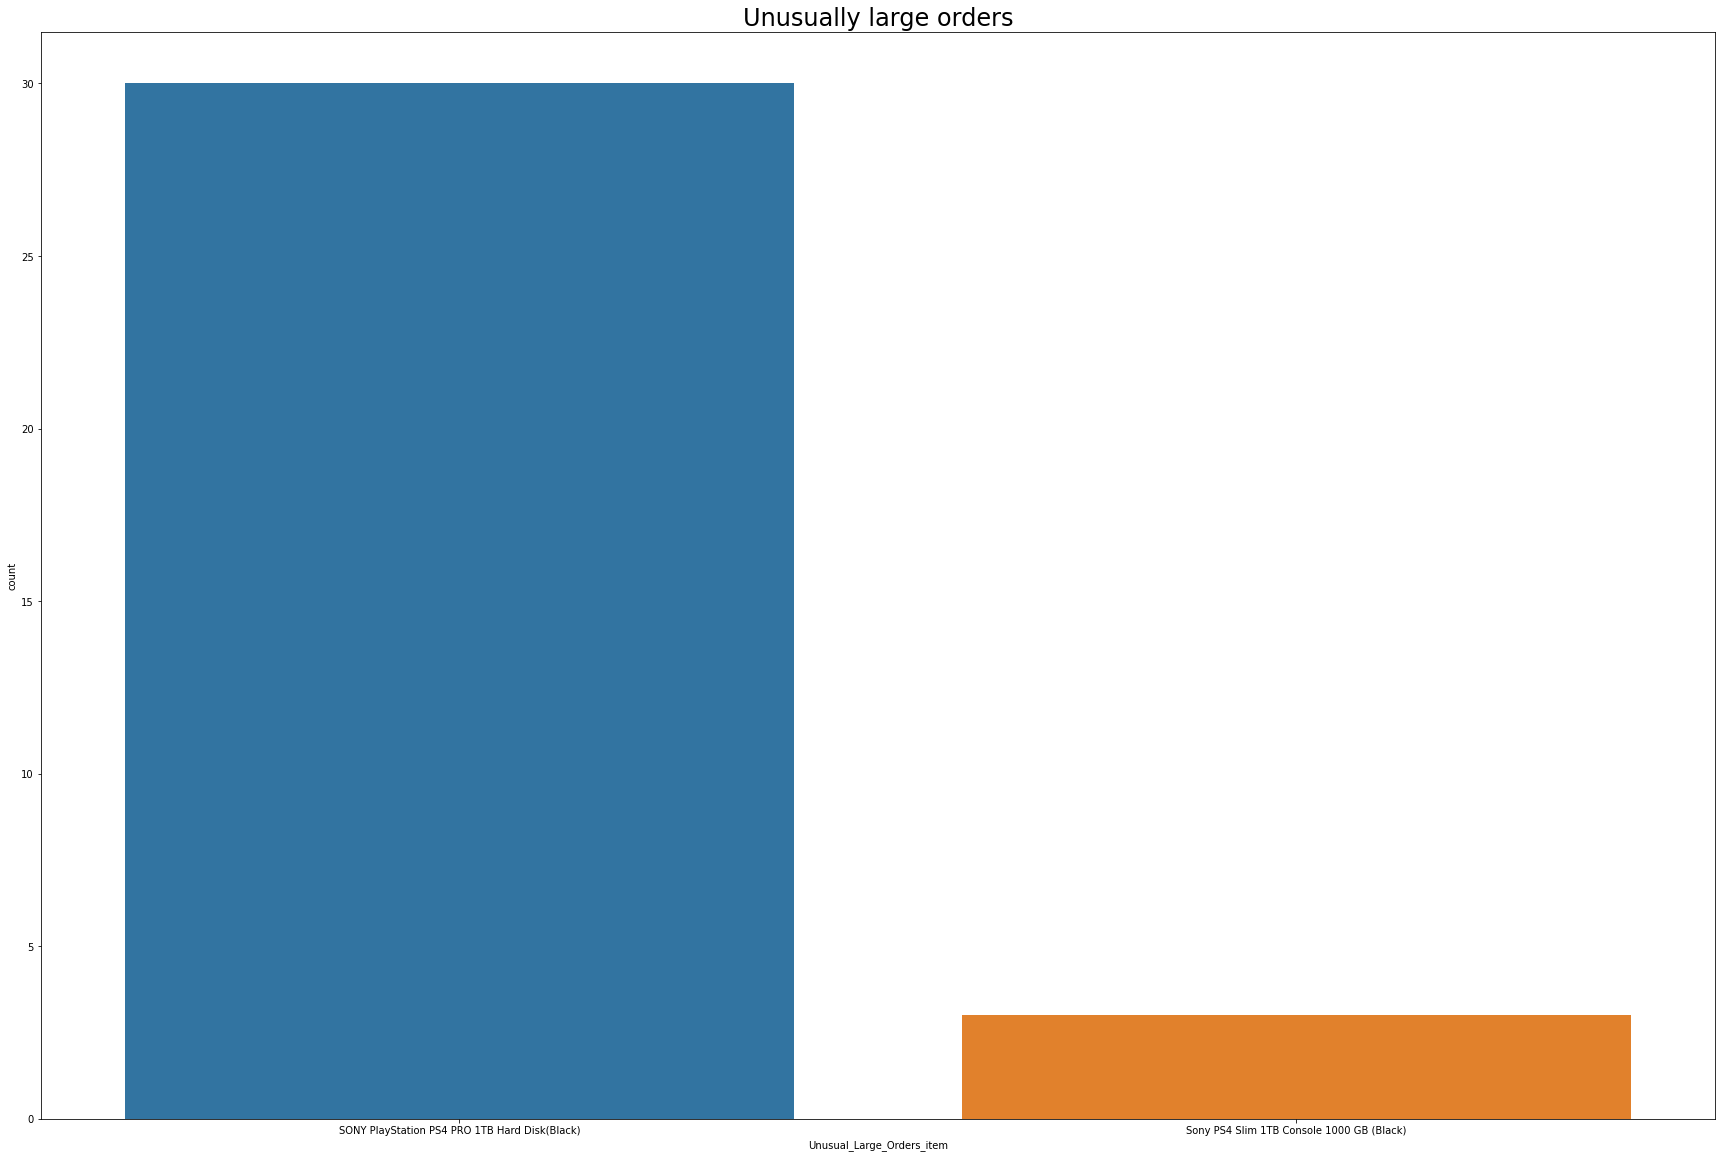

In [25]:
# PLOT - Unusually large orders
plt.figure(figsize=(30,20))
plt.title( "Unusually large orders" , size = 24 )
sns.countplot(dataset['Unusual_Large_Orders_item'])
plt.savefig('Fraud_check_3.pdf')
plt.show()

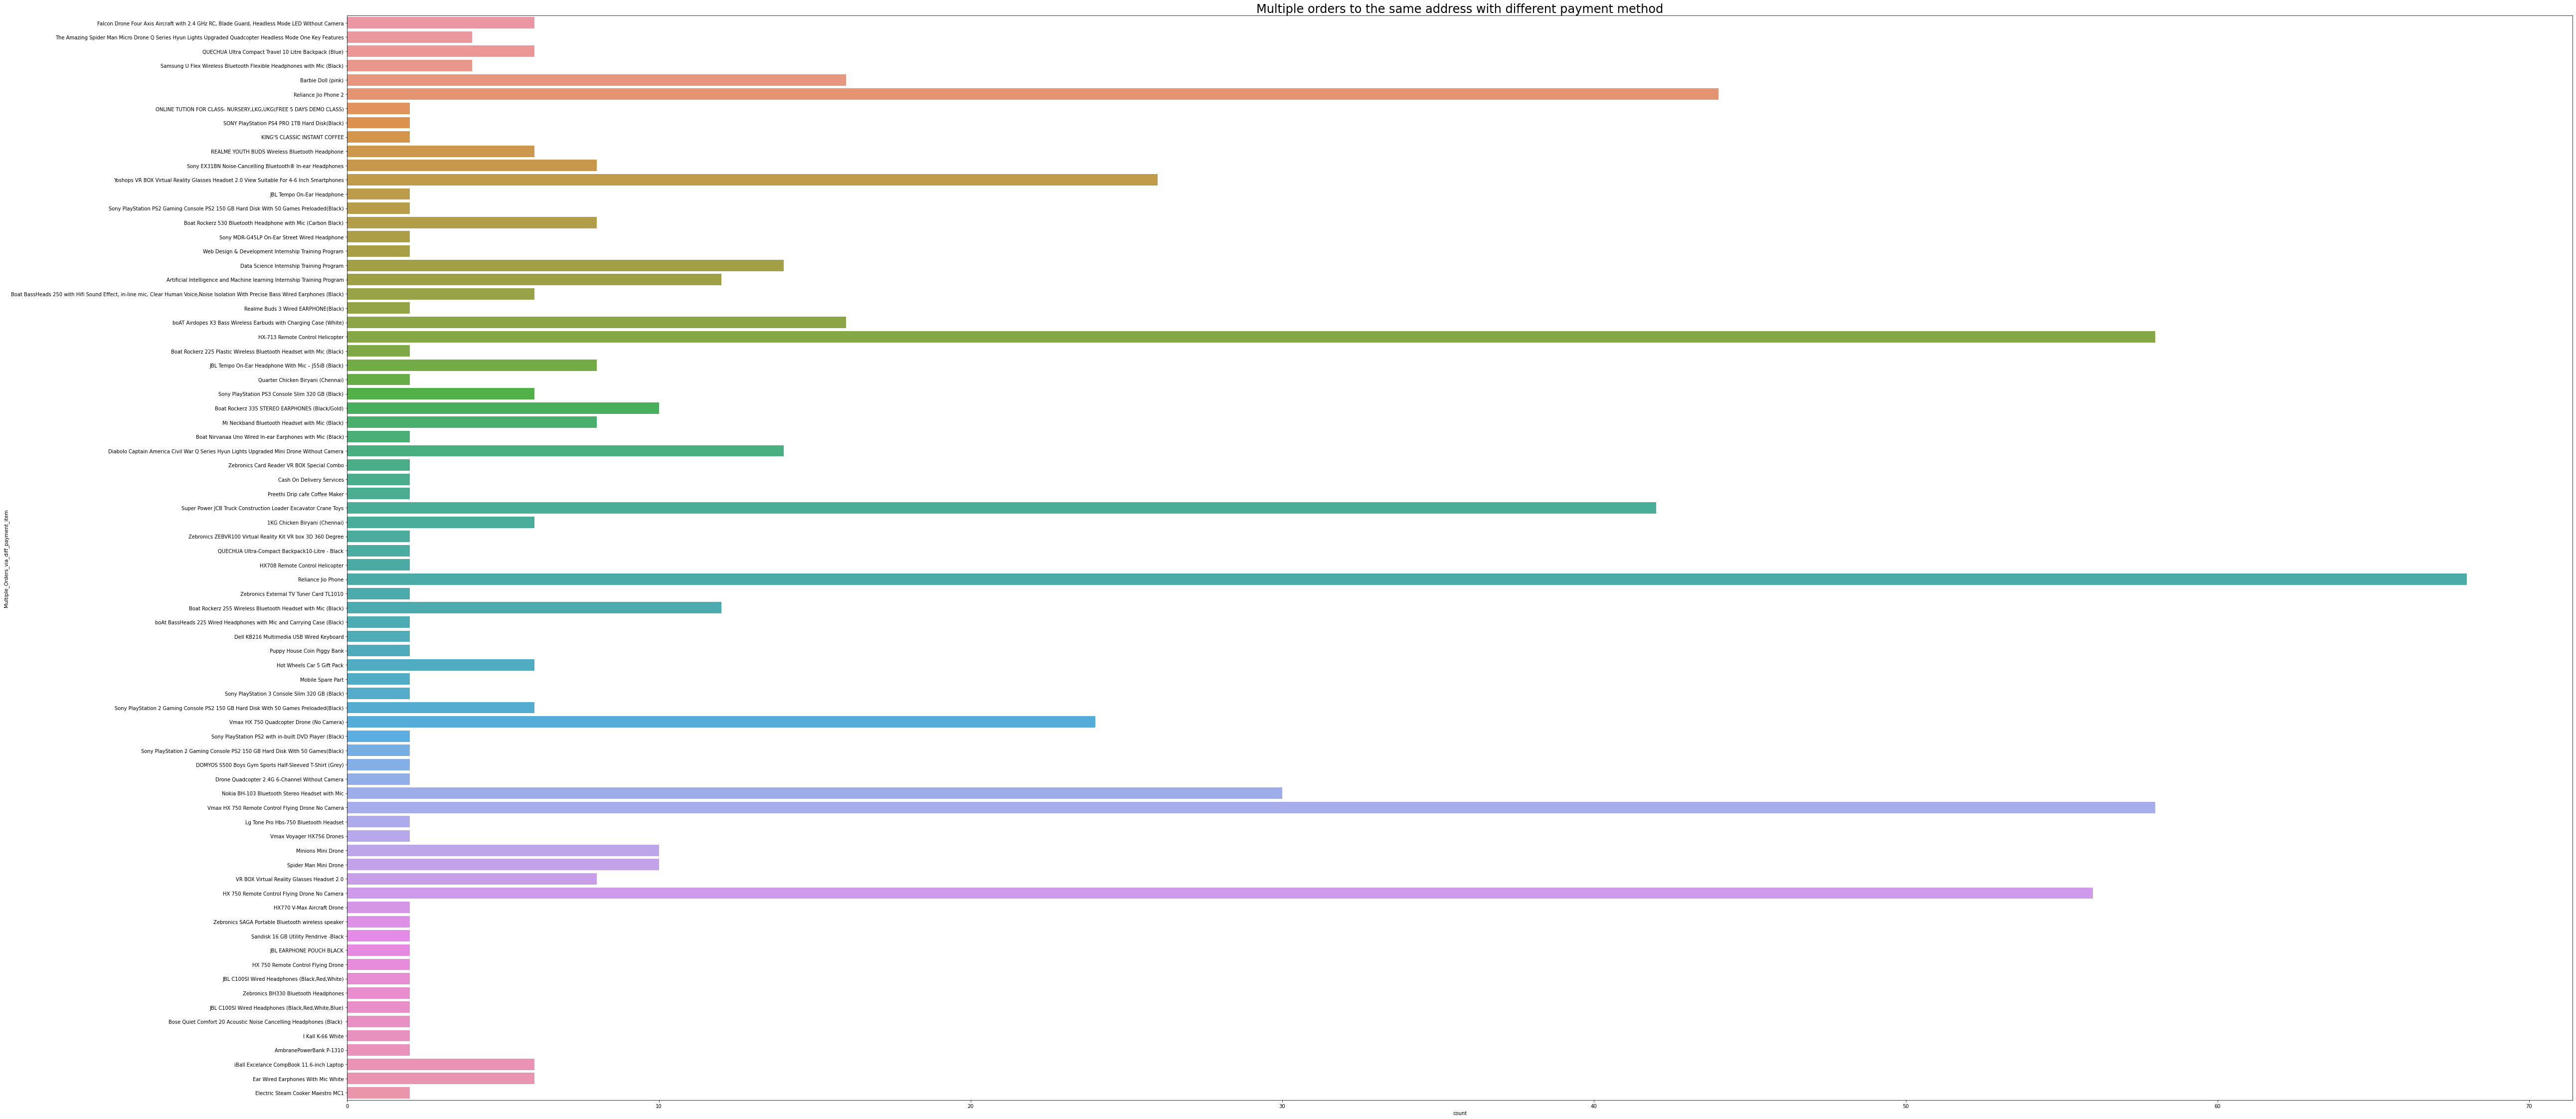

In [26]:
# PLOT - Multiple orders to the same address with different payment method
plt.figure(figsize=(80,40))
plt.title( "Multiple orders to the same address with different payment method" , size = 24 )
sns.countplot(y='Multiple_Orders_via_diff_payment_item',data=dataset)
plt.savefig('Fraud_check_4.pdf')
plt.show()

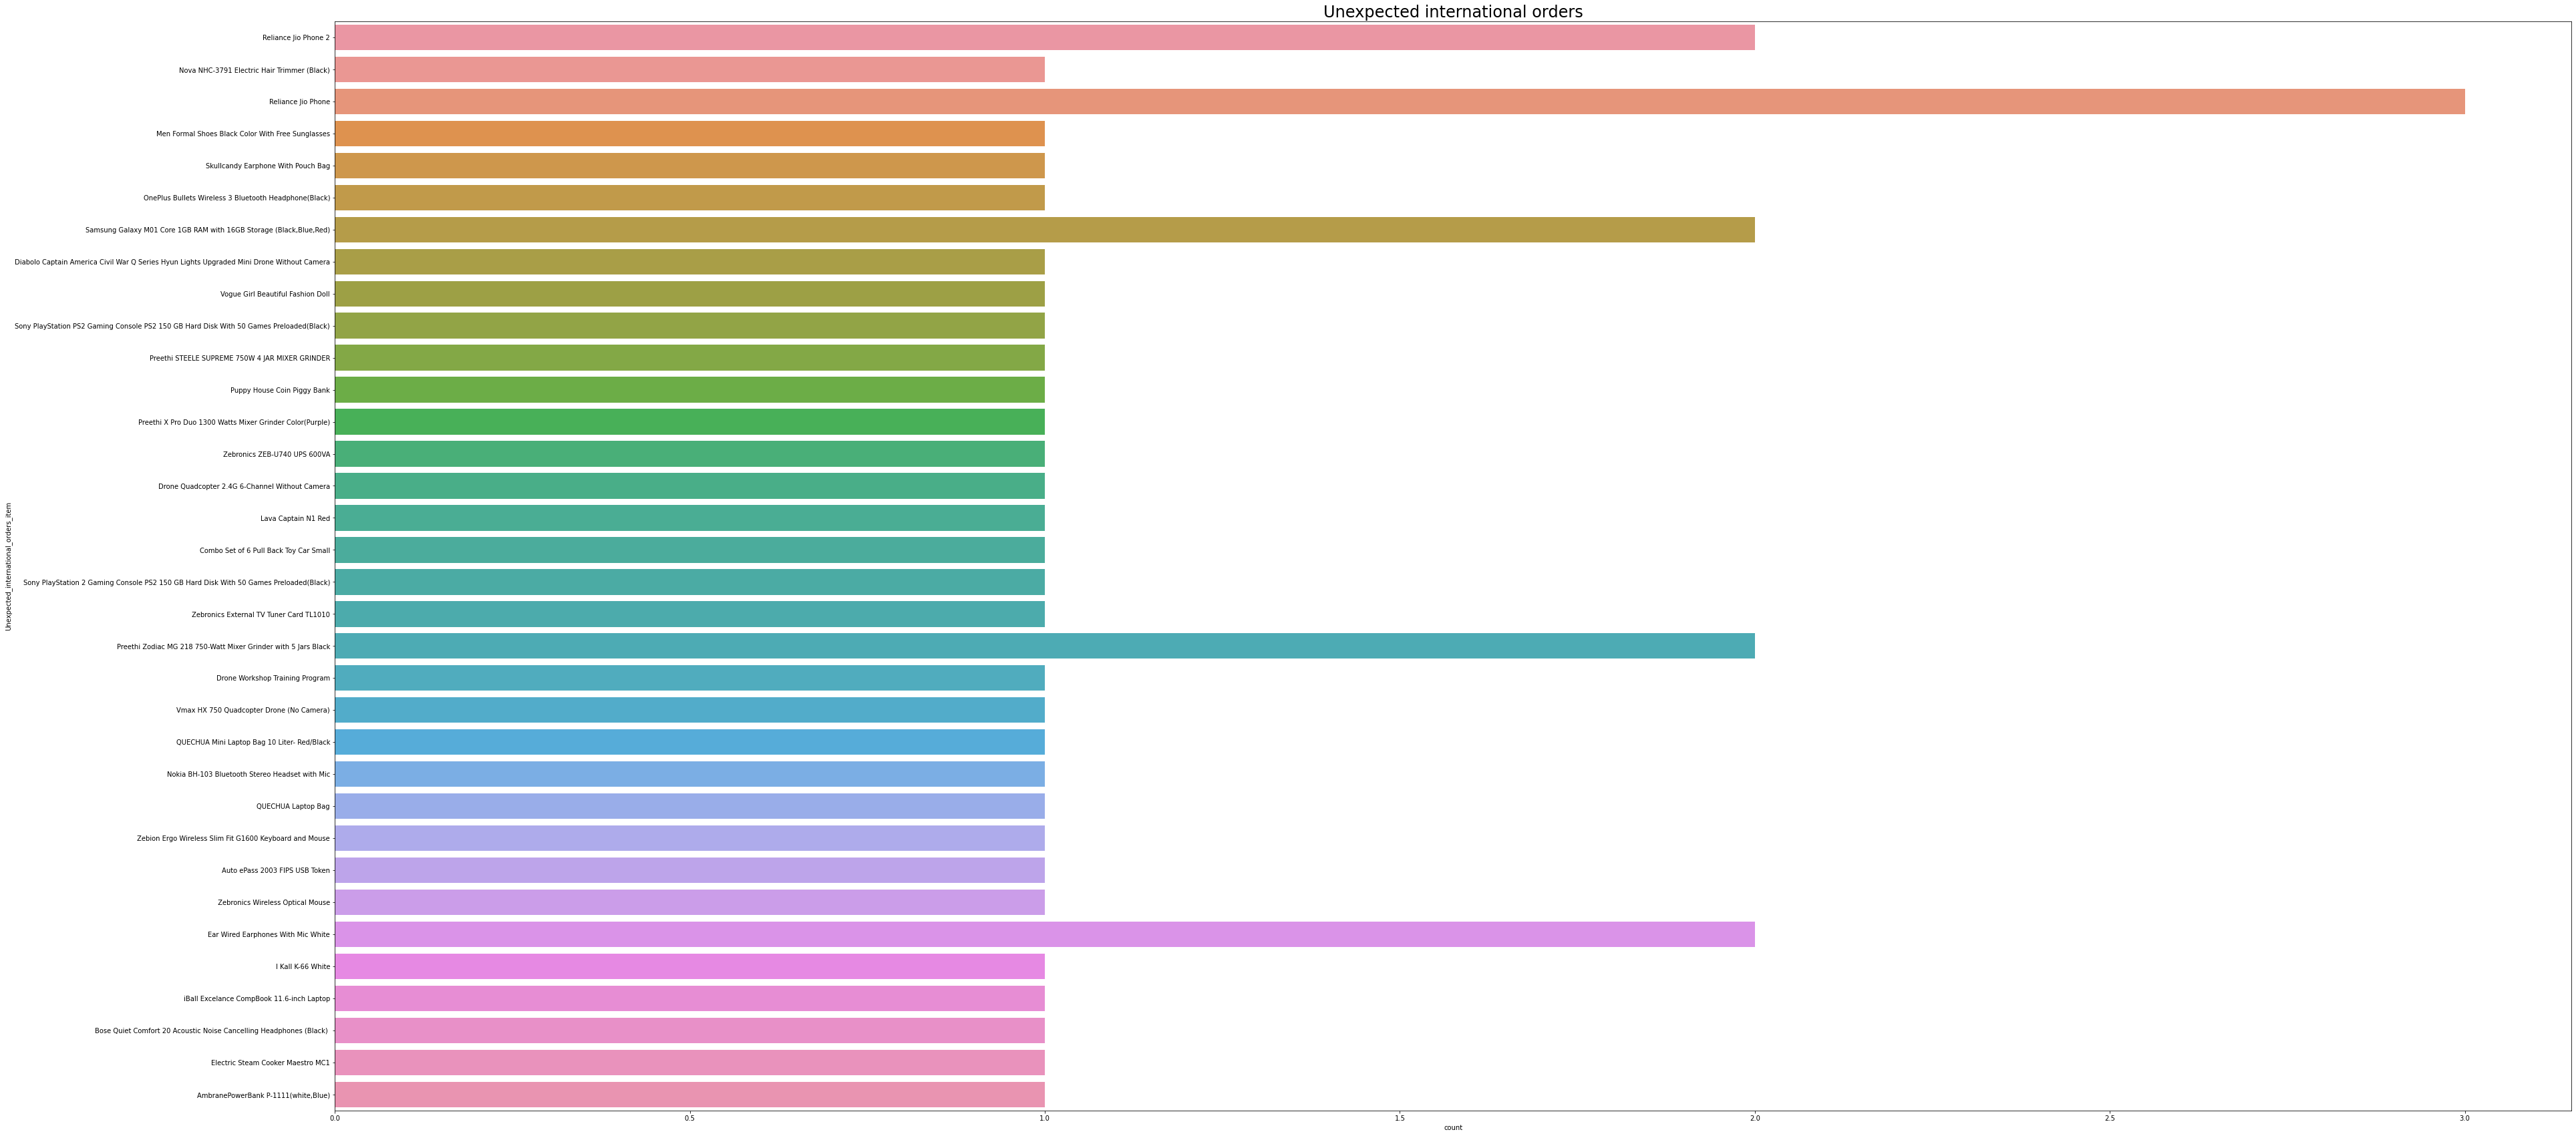

In [27]:
# PLOT - Unexpected international orders
plt.figure(figsize=(60,30))
plt.title( "Unexpected international orders" , size = 24 )
sns.countplot(y='Unexpected_international_orders_item',data = dataset)
plt.savefig('Fraud_check_5.pdf')
plt.show()

In [28]:
df=dataset[['Same_Billing_Shipping_Address','Same_Billing_Shipping_Address_item','Multiple_Orders','Multiple_Orders_item','Unusual_Large_Orders','Unusual_Large_Orders_item','Multiple_Orders_via_diff_payment','Multiple_Orders_via_diff_payment_item','Unexpected_international_orders','Unexpected_international_orders_item']]
df = df.dropna(how='all')

In [29]:
df.to_excel('F:/Yoshops/Task_3/Fraud_Buyers_Identification.xlsx')